In [1]:
import importlib
import sys
import os
import glob
import time
#import h5py
import traceback

import pandas as pd
import numpy as np
import matplotlib as mpl
mpl.use('nbagg')
import seaborn as sns
import pylab as pl

# import some custom funcs
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import utils as util
import behavior as butil
import auxiliary as aux
import plotting as putil

In [2]:
util.set_sns_style(style='dark', min_fontsize=8)
%matplotlib notebook
rootdir = util.get_rootdir()
rootdir

'/home/julianarhee/edgetracking-googledrive/Edge_Tracking/Data'

In [35]:
#rootdir = '/Volumes/Julie/2p-data'
rootdir = '/mnt/minerva/2p-data'
# -------------------------------------------------
date = 20230822 #20230725 #20230822 #20230822
flynum = 5
# -------------------------------------------------
# get directories
session = str(date)
sessdir = os.path.join(rootdir, session)
print(sessdir)
# behavior data
behavior_dir = os.path.join(sessdir, 'behavior')
logdir = os.path.join(sessdir, 'behavior') #'logfiles')
videodir = os.path.join(sessdir, 'behavior') #'videos')
# 2p data
neural_dir = os.path.join(sessdir, 'raw')

# fly ID -------------------------------------------
flyid = 'fly{}'.format(flynum)
logfiles = aux.get_logs_for_fly_date(date, flynum, logdir)
logfiles
#
figid = '{}-{}'.format(session, flyid)
print(figid)

# DESTDIR -------------------------------------------
destdir = os.path.join(rootdir, session, 'processed')
if not os.path.exists(destdir):
    os.makedirs(destdir)

/mnt/minerva/2p-data/20230822
20230822-fly5


In [36]:
destdir = os.path.join(rootdir, session, 'processed')
if not os.path.exists(destdir):
    os.makedirs(destdir)

In [69]:
importlib.reload(aux)
importlib.reload(butil)
importlib.reload(util)

<module 'utils' from '/home/julianarhee/Repositories/plume-tracking/utils.py'>

In [70]:
# debug
#fn = logfiles[0]
# fn = '/mnt/minerva/2p-data/20230822/behavior/20230822-180322_P1_activation_fly5_000.log'
# print(fn)
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False) 
# df_  = aux.ft_skips_to_blocks(df_, acquisition_rate=fps)
# df_ = aux.process_df_blocks(df_)
# # df_ = aux.load_dataframe(fn)
# df_['blocknum'].unique()

/mnt/minerva/2p-data/20230822/behavior/20230822-180322_P1_activation_fly5_000.log
... WARNING: rel_time has skips, only taking up to 1st time point


/home/julianarhee/Repositories/plume-tracking/auxiliary.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
# exp_config = butil.load_experiment_config(fn)
# fps = exp_config['experiment']['acquisition_rate']
# df_ = butil.load_dataframe(fn, is_odor=False, remove_invalid=False)
# Find restarts:
# df_[(df_['ft_posx']==0) & (df_['ft_posy']==0)]
# bad_skips = butil.check_ft_skips(df_, acquisition_rate=fps, return_skips=True)
# index of bad_skips is df_.loc[x], where x is the 0,0 restart.

In [73]:
xvar = 'ft_posx'
yvar = 'ft_posy'
default_cond = 'tap'
d_list = []
for fn in logfiles: 
    print(fn)
    try:
        #fpath = os.path.join(logdir, '{}.log'.format(fn))
        curr_cond = aux.extract_fly_condition_from_filename(flyid, fn)
        if curr_cond in ('', None):
            curr_cond = default_cond
        df_ = aux.load_dataframe(fn)
        df_['condition'] = curr_cond
        df_['flyid'] = flyid
        df_.loc[df_['speed']>100] = None
        #fly_id = os.path.splitext(os.path.split(fpath)[-1])[0]
        d_list.append(df_)
    except Exception as e:
        print("ERROR: {}".format(fn))
        traceback.print_exc()
df0 = pd.concat(d_list, axis=0)

/mnt/minerva/2p-data/20230822/behavior/20230822-180203_P1_activation_fly5_000.log
/mnt/minerva/2p-data/20230822/behavior/20230822-180322_P1_activation_fly5_000.log
... WARNING: rel_time has skips, only taking up to 1st time point
/mnt/minerva/2p-data/20230822/behavior/20230822-182855_P1_activation_fly5_002.log


/home/julianarhee/Repositories/plume-tracking/auxiliary.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


... WARNING: rel_time has skips, only taking up to 1st time point
/mnt/minerva/2p-data/20230822/behavior/20230822-185038_P1_activation_fly5_003.log


/home/julianarhee/Repositories/plume-tracking/auxiliary.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


... WARNING: rel_time has skips, only taking up to 1st time point


/home/julianarhee/Repositories/plume-tracking/auxiliary.py:156: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
filenames = sorted(df0['filename'].dropna().unique(), key=util.natsort)
filenames

['20230822-180203_P1_activation_fly5_000',
 '20230822-180322_P1_activation_fly5_000',
 '20230822-182855_P1_activation_fly5_002',
 '20230822-185038_P1_activation_fly5_003']

In [75]:
#df = df0[df0['filename']==filenames[0]].copy()
df_list = []
for fi, (fn, df) in enumerate(df0.groupby('filename')):
    print(fi)
    # Get last points of 1st file
    last_x, last_y, last_t = df[df['blocknum']==0][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
    for bnum, block_ in df.groupby('blocknum'):
        if bnum==0:
            continue
        print(bnum, last_x, last_y, last_t)
        curr_xvs = df[df['blocknum']==bnum]['ft_posx'].values
        curr_yvs = df[df['blocknum']==bnum]['ft_posy'].values
        #curr_ts = df[df['blocknum']==bnum]['rel_time'].values
        # add offsets
        df.loc[df['blocknum']==bnum, 'ft_posx'] = curr_xvs + last_x
        df.loc[df['blocknum']==bnum, 'ft_posy'] = curr_yvs + last_y
        #df.loc[df['blocknum']==bnum, 'rel_time'] = curr_ts + last_t
        # update last
        last_x, last_y, last_t = df[df['blocknum']==bnum][['ft_posx', 'ft_posy', 'rel_time']].iloc[-1]
    # reprocess with updated position info
    df_p = butil.process_df(df, fps=fps, filter_duration=False)
    df_list.append(df_p)
merged = pd.concat(df_list, axis=0)

0
1
2
3


In [76]:
# save
merged_data_fpath = os.path.join(destdir, '{}.pkl'.format(figid))
print(merged_data_fpath)
merged.to_pickle(merged_data_fpath)  # where to save it, usually as a .pkl
merged.to_csv(merged_data_fpath.replace('pkl', 'csv'))

/mnt/minerva/2p-data/20230822/processed/20230822-fly5.pkl


<IPython.core.display.Javascript object>


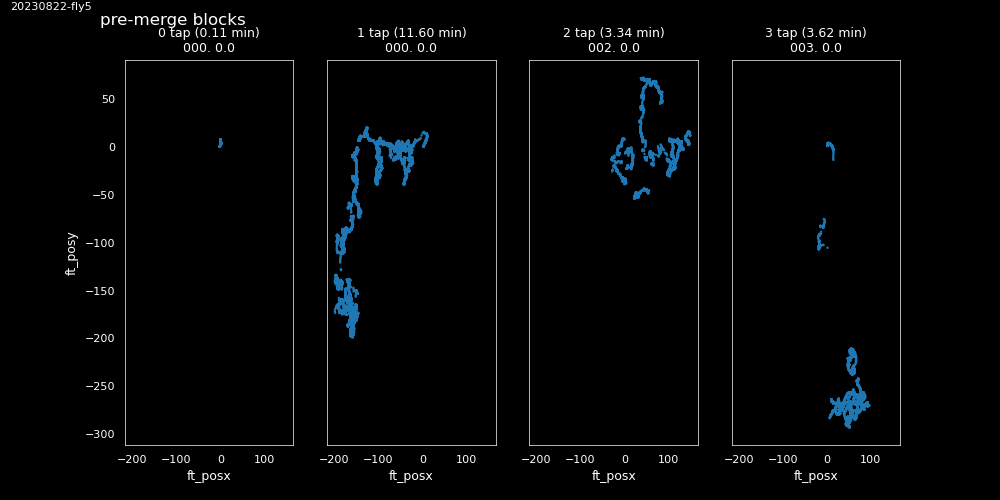

20230822-185038_P1_activation_fly5_003
tracking_premerge-bouts


In [77]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = len(filenames)
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(df0.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    for ci, (bk, df2) in enumerate(df_.groupby('blocknum')):
        ax=axn[fi]
        dur_min = df_['rel_time'].max() / 60.
        sns.scatterplot(data=df2, x=xvar, y=yvar, ax=ax,
                       edgecolor='none', s=3 , legend=0, hue='blocknum', color=colors[ci])
        curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
fig.text(0.1, 0.95, 'pre-merge blocks', fontsize=12)


util.label_figure(fig, figid)
figname = 'tracking_premerge-bouts'
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

## double-check correct position updating

<IPython.core.display.Javascript object>


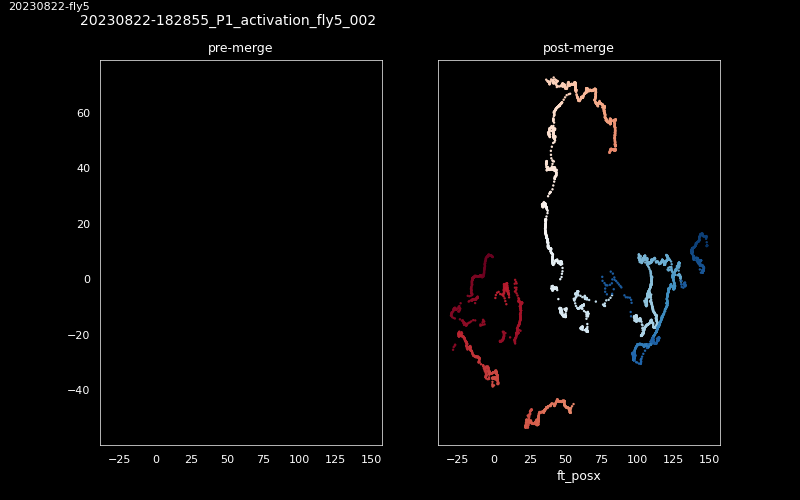

/tmp/ipykernel_195257/2033756753.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df0_[df0_['blocknum']==1], x=xvar, y=yvar, ax=ax,


tracking_check-merge_traj-by-time


<IPython.core.display.Javascript object>


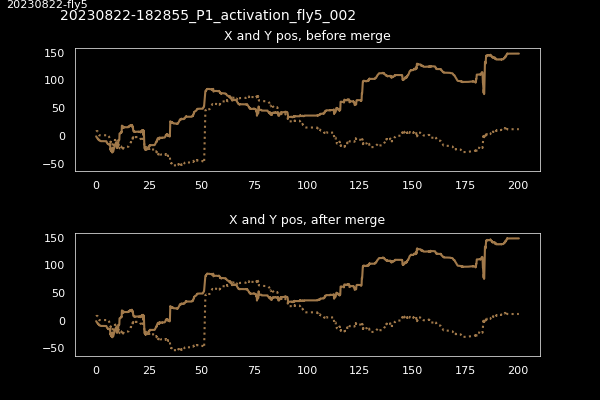

tracking_check-merge_xy-blocks


In [80]:
# ------------------------------------------ 
# check trajector pre/post
# ------------------------------------------
fn = df0['filename'].unique()[3]
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(1,2, figsize=(8,5), sharex=True, sharey=True)
fig.text(0.1, 0.95, fn)
ax=axn[0]; ax.set_title('pre-merge')
sns.scatterplot(data=df0_[df0_['blocknum']==1], x=xvar, y=yvar, ax=ax, 
                hue='rel_time',palette='RdBu',
                edgecolor='none', s=3 , legend=0) 
ax=axn[1]; ax.set_title('post-merge')
sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, hue='rel_time',palette='RdBu',
                       edgecolor='none', s=3 , legend=0)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_traj-by-time'
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

# ------------------------------------------ 
# split x, y by block
# ------------------------------------------
fig, axn = pl.subplots(2, 1)
fig.text(0.1, 0.95, fn)
ax=axn[0]
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, before merge')
ax=axn[1]
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
ax.set_title('X and Y pos, after merge')
pl.subplots_adjust(hspace=0.5)

util.label_figure(fig, figid)
figname = 'tracking_check-merge_xy-blocks'
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

In [16]:
merged['filename'].unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

<IPython.core.display.Javascript object>


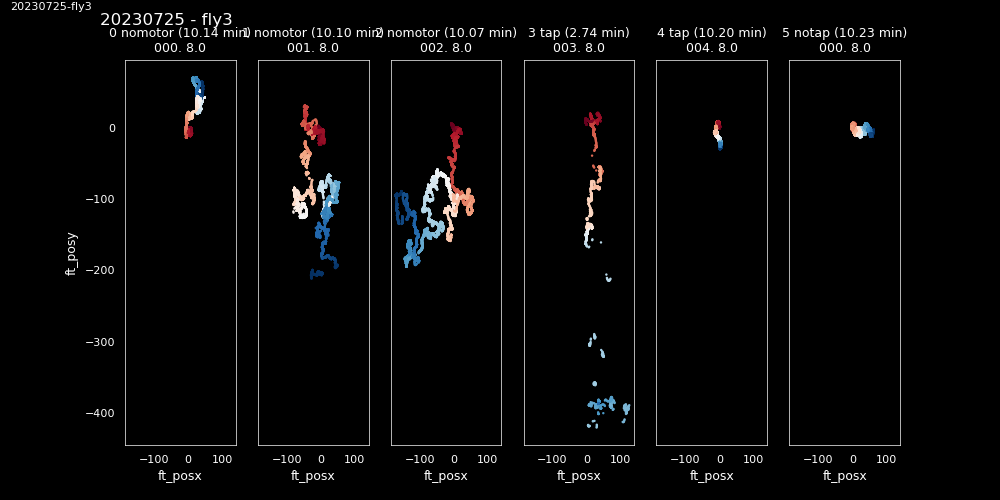

20230725-174143_P1_activation_fly3-notap_000
tracking_premerge-bouts_by-time


In [18]:
#curr_trials = df0[['filename', 'blocknum']].drop_duplicates().dropna().shape[0]
n_trials = merged['filename'].dropna().nunique()
max_nblocks = int(df0['blocknum'].max()+1)
fig, axn = pl.subplots(1, n_trials, figsize=(10, 5), sharex=True, sharey=True)
    
for fi, (fn, df_) in enumerate(merged.sort_values(by='filename').groupby('filename')):
    colors = sns.color_palette('cubehelix', n_colors=df_['blocknum'].nunique())
    ax=axn[fi]
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} {} ({:.2f} min)\n{}. {}'.format(fi, curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    #ax.set_aspect('equal')
#util.label_figure(fig, '{}'.format(os.path.split(fn)[-1]))
figname = '{}'.format(fn)
print(fn)
    
fig.text(0.1, 0.95, '{} - {}'.format(date, flyid), fontsize=12)

util.label_figure(fig, figid)
figname = 'tracking_premerge-bouts_by-time'
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

In [19]:
merged['filename'].unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

In [20]:
df0['filename'].dropna().unique()

array(['20230725-161941_P1_activation_fly3-nomotor_000',
       '20230725-164507_P1_activation_fly3-nomotor_001',
       '20230725-170529_P1_activation_fly3-nomotor_002',
       '20230725-172103_P1_activation_fly3_003',
       '20230725-172509_P1_activation_fly3_004',
       '20230725-174143_P1_activation_fly3-notap_000'], dtype=object)

## Look at 1 trial

In [21]:
filenames

['20230725-161941_P1_activation_fly3-nomotor_000',
 '20230725-164507_P1_activation_fly3-nomotor_001',
 '20230725-170529_P1_activation_fly3-nomotor_002',
 '20230725-172103_P1_activation_fly3_003',
 '20230725-172509_P1_activation_fly3_004',
 '20230725-174143_P1_activation_fly3-notap_000']

20230725-172509_P1_activation_fly3_004


<IPython.core.display.Javascript object>


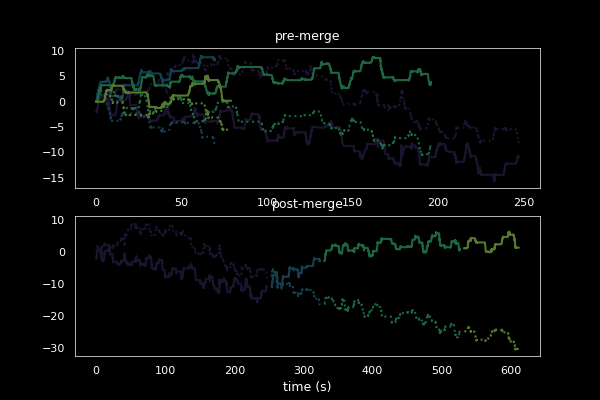

Text(0.5, 0, 'time (s)')

In [28]:
fn = filenames[4]
print(fn)
df0_ = df0[df0['filename']==fn].copy()
df1_ = merged[merged['filename']==fn].copy()
fig, axn = pl.subplots(2, 1)
ax=axn[0]; ax.set_title('pre-merge');
for c, (bnum, b_) in zip(colors, df0_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax=axn[1]; ax.set_title('post-merge')
for c, (bnum, b_) in zip(colors, df1_.groupby('blocknum')):
    ax.plot(b_['rel_time'], b_['ft_posx'], color=c)
    ax.plot(b_['rel_time'], b_['ft_posy'], color=c, linestyle=':')
    
ax.set_xlabel('time (s)')

<IPython.core.display.Javascript object>


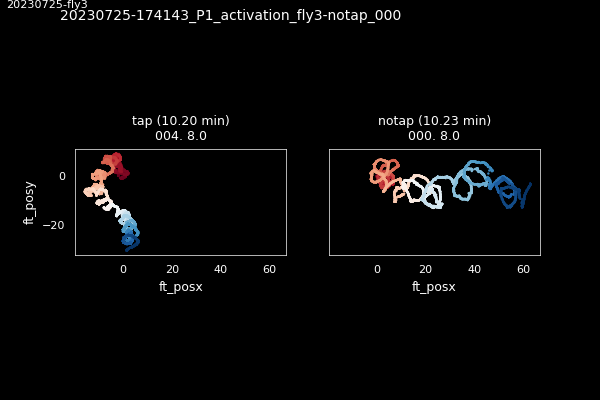

tracking_by-time_tap_v_notap


In [29]:
fig, axn = pl.subplots(1, 2, sharex=True, sharey=True)
f1 = filenames[4];
f2 = filenames[5]

for ai, fn in enumerate([f1, f2]):
    ax=axn[ai]
    df1_ = merged[merged['filename']==fn].copy()
    dur_min = df1_['rel_time'].max() / 60.
    sns.scatterplot(data=df1_, x=xvar, y=yvar, ax=ax, palette='RdBu',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df1_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)

util.label_figure(fig, figid)
figname = 'tracking_by-time_tap_v_notap'
pl.savefig(os.path.join(destdir, '{}.png'.format(figname)))
print(figname)

<IPython.core.display.Javascript object>


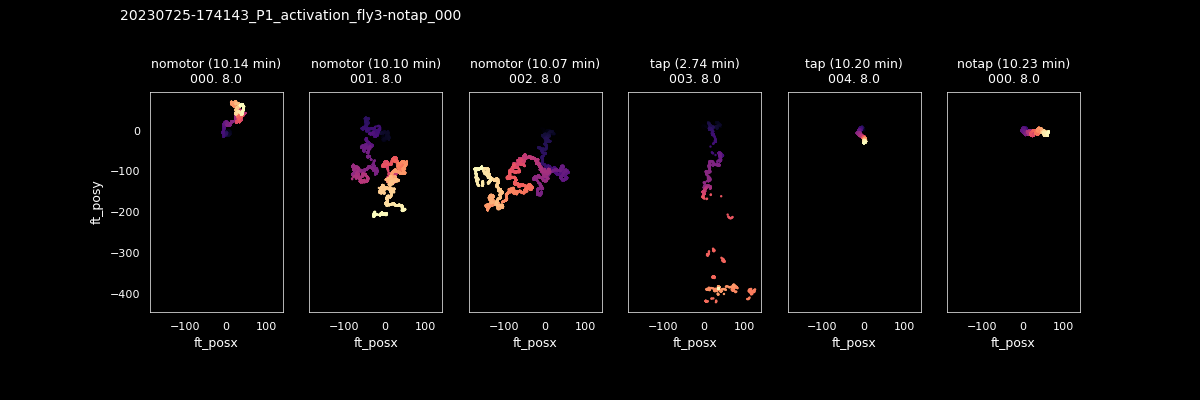

Text(0.1, 0.95, '20230725-174143_P1_activation_fly3-notap_000')

In [33]:
n_files = len(filenames)
fig, axn = pl.subplots(1, n_files, sharex=True, sharey=True, figsize=(n_files*2, 4))
for ai, (fn, df_) in enumerate(merged.groupby('filename')):
    ax=axn[ai]
    #df1_ = merged[merged['filename']==fn].copy()
    dur_min = df_['rel_time'].max() / 60.
    sns.scatterplot(data=df_, x=xvar, y=yvar, ax=ax, palette='magma',
                   edgecolor='none', s=3 , legend=0, hue='rel_time') #color=colors[ci])
                    #hue_norm=mpl.colors.Normalize(vmin=0, vmax=1800))
    curr_cond = df_['condition'].unique()[0]
    ax.set_title('{} ({:.2f} min)\n{}. {}'.format(curr_cond, dur_min, \
                                                  fn.split('_')[-1], bk))
    ax.set_aspect('equal')
fig.text(0.1, 0.95, fn)


In [118]:
df1_['blocknum'].unique()

array([0.])